In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('train.csv', engine='python')
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [3]:
test = pd.read_csv('test.csv', engine='python')
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test['기온(°C)'] = test['기온(°C)'].fillna(method='pad')
test['풍속(m/s)'] = test['풍속(m/s)'].fillna(method='pad')
test['습도(%)'] = test['습도(%)'].fillna(method='pad')
test['강수량(mm, 6시간)'] = test['강수량(mm, 6시간)'].fillna(method='pad')
test['일조(hr, 3시간)'] = test['일조(hr, 3시간)'].fillna(method='pad')
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,27.8,1.5,74.0,0.0,0.0,NaN,NaN
2,1,2020-08-25 02,27.8,1.5,74.0,0.0,0.0,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,0.0,0.0,NaN,NaN
4,1,2020-08-25 04,27.3,1.1,78.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,29.0,3.3,65.0,0.0,0.8,NaN,NaN
10076,60,2020-08-31 20,29.0,3.3,65.0,0.0,0.8,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,0.0,0.0,1.0,1.0
10078,60,2020-08-31 22,27.9,4.1,68.0,0.0,0.0,NaN,NaN


In [5]:
alldata = pd.concat([train, test])
alldata

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,"강수량(mm, 6시간)","일조(hr, 3시간)"
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,NaN,NaN
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,NaN,NaN
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,NaN,NaN
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,29.0,3.3,65.0,NaN,NaN,NaN,NaN,0.0,0.8
10076,60,2020-08-31 20,NaN,29.0,3.3,65.0,NaN,NaN,NaN,NaN,0.0,0.8
10077,60,2020-08-31 21,NaN,27.9,4.1,68.0,NaN,NaN,1.0,1.0,0.0,0.0
10078,60,2020-08-31 22,NaN,27.9,4.1,68.0,NaN,NaN,NaN,NaN,0.0,0.0


In [6]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132480 entries, 0 to 10079
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   num           132480 non-null  int64  
 1   date_time     132480 non-null  object 
 2   전력사용량(kWh)    122400 non-null  float64
 3   기온(°C)        132480 non-null  float64
 4   풍속(m/s)       132480 non-null  float64
 5   습도(%)         132480 non-null  float64
 6   강수량(mm)       122400 non-null  float64
 7   일조(hr)        122400 non-null  float64
 8   비전기냉방설비운영     124696 non-null  float64
 9   태양광보유         124024 non-null  float64
 10  강수량(mm, 6시간)  10080 non-null   float64
 11  일조(hr, 3시간)   10080 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 13.1+ MB


In [7]:
alldata['date_time'] = pd.to_datetime(alldata['date_time'], format='%Y-%m-%d %H')
alldata['month'] = alldata['date_time'].dt.month
alldata['weekday'] = alldata['date_time'].dt.weekday
alldata['day'] = alldata['date_time'].dt.day
alldata['hour'] = alldata['date_time'].dt.hour
alldata

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,"강수량(mm, 6시간)","일조(hr, 3시간)",month,weekday,day,hour
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,NaN,NaN,6,0,1,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,NaN,NaN,6,0,1,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,NaN,NaN,6,0,1,2
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,NaN,NaN,6,0,1,3
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,NaN,NaN,6,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,NaN,29.0,3.3,65.0,NaN,NaN,NaN,NaN,0.0,0.8,8,0,31,19
10076,60,2020-08-31 20:00:00,NaN,29.0,3.3,65.0,NaN,NaN,NaN,NaN,0.0,0.8,8,0,31,20
10077,60,2020-08-31 21:00:00,NaN,27.9,4.1,68.0,NaN,NaN,1.0,1.0,0.0,0.0,8,0,31,21
10078,60,2020-08-31 22:00:00,NaN,27.9,4.1,68.0,NaN,NaN,NaN,NaN,0.0,0.0,8,0,31,22


왜도 : 2.569979214229397
첨도 : 8.998589167827355


<AxesSubplot:xlabel='전력사용량(kWh)', ylabel='Density'>

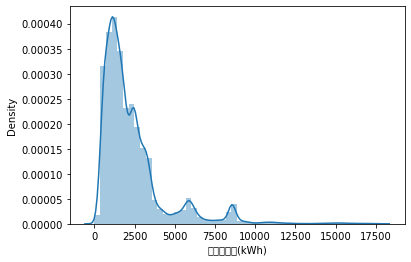

In [8]:
print('왜도 :',alldata['전력사용량(kWh)'].skew())
print('첨도 :',alldata['전력사용량(kWh)'].kurtosis())
sns.distplot(alldata['전력사용량(kWh)'])

In [9]:
alldata['비전기냉방설비운영'] = alldata['비전기냉방설비운영'].fillna(0.0)
alldata['태양광보유'] = alldata['태양광보유'].fillna(0.0)
alldata

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,"강수량(mm, 6시간)","일조(hr, 3시간)",month,weekday,day,hour
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,NaN,NaN,6,0,1,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,NaN,NaN,6,0,1,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,NaN,NaN,6,0,1,2
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,NaN,NaN,6,0,1,3
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,NaN,NaN,6,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,NaN,29.0,3.3,65.0,NaN,NaN,0.0,0.0,0.0,0.8,8,0,31,19
10076,60,2020-08-31 20:00:00,NaN,29.0,3.3,65.0,NaN,NaN,0.0,0.0,0.0,0.8,8,0,31,20
10077,60,2020-08-31 21:00:00,NaN,27.9,4.1,68.0,NaN,NaN,1.0,1.0,0.0,0.0,8,0,31,21
10078,60,2020-08-31 22:00:00,NaN,27.9,4.1,68.0,NaN,NaN,0.0,0.0,0.0,0.0,8,0,31,22


In [10]:
alldata.isnull().sum()

num                  0
date_time            0
전력사용량(kWh)       10080
기온(°C)               0
풍속(m/s)              0
습도(%)                0
강수량(mm)          10080
일조(hr)           10080
비전기냉방설비운영            0
태양광보유                0
강수량(mm, 6시간)    122400
일조(hr, 3시간)     122400
month                0
weekday              0
day                  0
hour                 0
dtype: int64

<AxesSubplot:xlabel='weekday', ylabel='전력사용량(kWh)'>

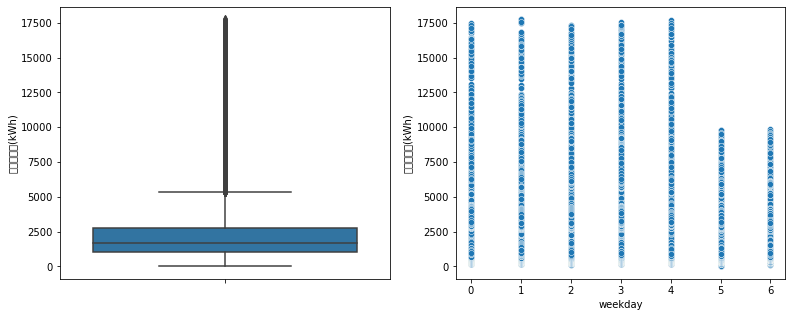

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
sns.boxplot(y=alldata['전력사용량(kWh)'], ax=ax[0])
sns.scatterplot(alldata['weekday'], alldata['전력사용량(kWh)'], ax=ax[1])

In [12]:
alldata['전력사용량(kWh)'].max()

17739.225

In [13]:
alldata[alldata['전력사용량(kWh)']>10000]

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,"강수량(mm, 6시간)","일조(hr, 3시간)",month,weekday,day,hour
14289,8,2020-06-01 09:00:00,10441.37160,20.6,1.4,64.0,0.0,1.0,1.0,1.0,NaN,NaN,6,0,1,9
14290,8,2020-06-01 10:00:00,10352.39040,21.1,2.4,54.0,0.0,1.0,1.0,1.0,NaN,NaN,6,0,1,10
14291,8,2020-06-01 11:00:00,10368.26903,22.5,2.8,45.0,0.0,1.0,1.0,1.0,NaN,NaN,6,0,1,11
14293,8,2020-06-01 13:00:00,10971.36124,24.8,3.8,29.0,0.0,1.0,1.0,1.0,NaN,NaN,6,0,1,13
14294,8,2020-06-01 14:00:00,12991.52430,25.3,2.3,32.0,0.0,1.0,1.0,1.0,NaN,NaN,6,0,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77510,38,2020-08-24 14:00:00,12405.96000,31.5,3.3,60.0,0.0,0.7,1.0,1.0,NaN,NaN,8,0,24,14
77511,38,2020-08-24 15:00:00,12380.76000,31.4,3.8,60.0,0.0,0.6,1.0,1.0,NaN,NaN,8,0,24,15
77512,38,2020-08-24 16:00:00,12038.04000,31.4,3.9,57.0,0.0,1.0,1.0,1.0,NaN,NaN,8,0,24,16
77513,38,2020-08-24 17:00:00,11728.08000,30.5,3.5,58.0,0.0,0.6,1.0,1.0,NaN,NaN,8,0,24,17


In [14]:
#1번과 8번 건물의 평균 전력사용량이 유독 높게 나온것을 확인
alldata.groupby('num')['전력사용량(kWh)'].mean().to_frame('건물별')


,건물별
num,
1,8543.273488
2,1299.914365
3,3371.353699
4,763.997353
5,2714.509694
6,1184.129868
7,1527.138356
8,8837.364073
9,1256.884880


In [15]:
pd.DataFrame(alldata.corr()['전력사용량(kWh)'].sort_values(ascending=False))

,전력사용량(kWh)
전력사용량(kWh),1.000000
기온(°C),0.158361
비전기냉방설비운영,0.150799
태양광보유,0.116344
일조(hr),0.112131
풍속(m/s),0.109965
hour,0.091472
month,0.052146
day,0.013188
강수량(mm),-0.006028


<AxesSubplot:xlabel='hour', ylabel='전력사용량(kWh)'>

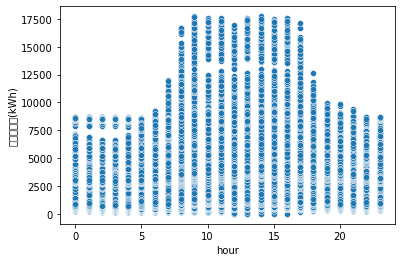

In [16]:
sns.scatterplot(alldata['hour'], alldata['전력사용량(kWh)'])

<AxesSubplot:xlabel='num', ylabel='전력사용량(kWh)'>

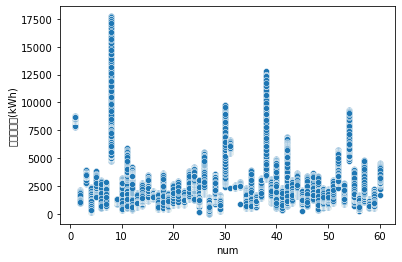

In [17]:
sns.scatterplot(alldata['num'], alldata['전력사용량(kWh)'])

<AxesSubplot:ylabel='전력사용량(kWh)'>

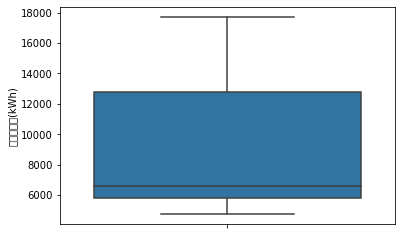

In [18]:
a=alldata[alldata['num']==8]
sns.boxplot(y=a['전력사용량(kWh)'])

In [19]:
alldata.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', '강수량(mm, 6시간)',
       '일조(hr, 3시간)', 'month', 'weekday', 'day', 'hour'],
      dtype='object')

In [20]:
alldata2 = alldata.drop(['date_time', '전력사용량(kWh)'], axis=1)

In [21]:
import re
alldata2 = alldata2.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [22]:
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]

In [23]:
train2 = train2.fillna(-1)
train2

,num,C,ms,,mm,hr,,,mm6,hr3,month,weekday,day,hour
0,1,17.6,2.5,92.0,0.8,0.0,0.0,0.0,-1.0,-1.0,6,0,1,0
1,1,17.7,2.9,91.0,0.3,0.0,0.0,0.0,-1.0,-1.0,6,0,1,1
2,1,17.5,3.2,91.0,0.0,0.0,0.0,0.0,-1.0,-1.0,6,0,1,2
3,1,17.1,3.2,91.0,0.0,0.0,0.0,0.0,-1.0,-1.0,6,0,1,3
4,1,17.0,3.3,92.0,0.0,0.0,0.0,0.0,-1.0,-1.0,6,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,27.8,2.3,68.0,0.0,0.7,1.0,1.0,-1.0,-1.0,8,0,24,19
122396,60,27.3,1.2,71.0,0.0,0.0,1.0,1.0,-1.0,-1.0,8,0,24,20
122397,60,27.3,1.8,71.0,0.0,0.0,1.0,1.0,-1.0,-1.0,8,0,24,21
122398,60,27.1,1.8,74.0,0.0,0.0,1.0,1.0,-1.0,-1.0,8,0,24,22


In [24]:
test2 = test2.fillna(-1)
test2

,num,C,ms,,mm,hr,,,mm6,hr3,month,weekday,day,hour
0,1,27.8,1.5,74.0,-1.0,-1.0,0.0,0.0,0.0,0.0,8,1,25,0
1,1,27.8,1.5,74.0,-1.0,-1.0,0.0,0.0,0.0,0.0,8,1,25,1
2,1,27.8,1.5,74.0,-1.0,-1.0,0.0,0.0,0.0,0.0,8,1,25,2
3,1,27.3,1.1,78.0,-1.0,-1.0,0.0,0.0,0.0,0.0,8,1,25,3
4,1,27.3,1.1,78.0,-1.0,-1.0,0.0,0.0,0.0,0.0,8,1,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,29.0,3.3,65.0,-1.0,-1.0,0.0,0.0,0.0,0.8,8,0,31,19
10076,60,29.0,3.3,65.0,-1.0,-1.0,0.0,0.0,0.0,0.8,8,0,31,20
10077,60,27.9,4.1,68.0,-1.0,-1.0,1.0,1.0,0.0,0.0,8,0,31,21
10078,60,27.9,4.1,68.0,-1.0,-1.0,0.0,0.0,0.0,0.0,8,0,31,22


In [25]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [26]:
rf = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
rf.fit(train2, train['전력사용량(kWh)'])
result1 = rf.predict(test2)
result1

array([8677.18656, 8676.37008, 8674.95744, ..., 3593.7    ,  648.04212,
        580.84128])

In [27]:
sub = pd.read_csv('sample_submission.csv')
sub

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [28]:
sub['answer'] = result1
sub

,num_date_time,answer
0,1 2020-08-25 00,8677.18656
1,1 2020-08-25 01,8676.37008
2,1 2020-08-25 02,8674.95744
3,1 2020-08-25 03,8659.67112
4,1 2020-08-25 04,8656.91712
...,...,...
10075,60 2020-08-31 19,819.56124
10076,60 2020-08-31 20,820.24164
10077,60 2020-08-31 21,3593.70000
10078,60 2020-08-31 22,648.04212


In [29]:
sub.to_csv('regression.csv', index=False)

In [30]:
time = pd.read_csv('second.csv')

In [31]:
#소프트 보팅
sub['answer'] = time['answer']*0.7 + sub['answer']*0.3
sub

,num_date_time,answer
0,1 2020-08-25 00,8328.672276
1,1 2020-08-25 01,8301.535134
2,1 2020-08-25 02,8277.024890
3,1 2020-08-25 03,8232.165661
4,1 2020-08-25 04,8222.949536
...,...,...
10075,60 2020-08-31 19,2443.800971
10076,60 2020-08-31 20,2433.279763
10077,60 2020-08-31 21,3293.417901
10078,60 2020-08-31 22,2292.217290
